# **House Price Prediction Web App**
#### **Data Collection Process (Web Scrapping)**


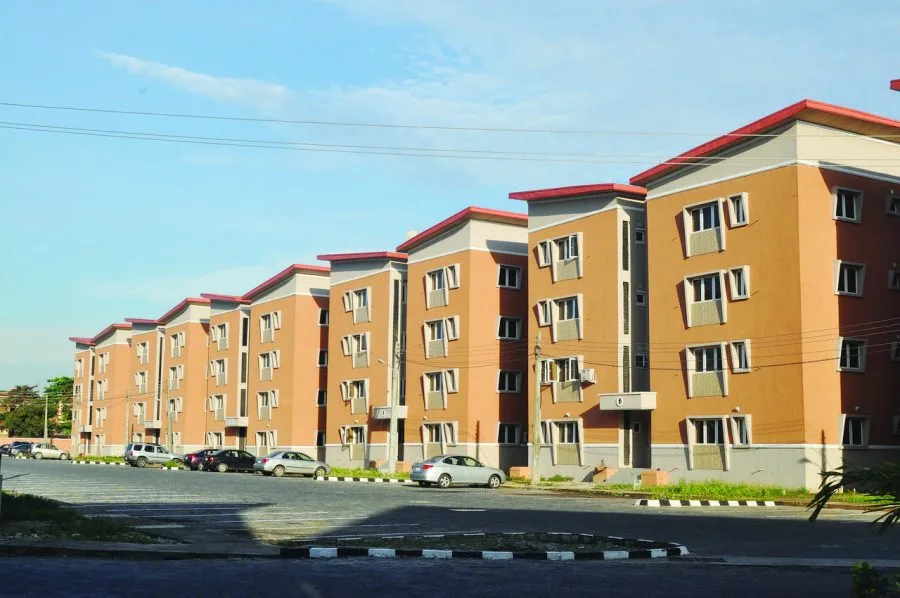

## **TABLE OF CONTENT**


1.0   What is Web Scrapping?

2.0   Project Overview
> 2.1 Project Phase Overview

3.0   Import Libraries 

4.0   Web Inspection

5.0   Data Extraction
> 5.1 Locations<br> 5.2 Facilities (Toilets, Beds  and Bathrooms)<br> 5.3 Prices<br> 5.4 House types

6.0 Data Merging

7.0 Data Exportation

8.0  Conclusion.





# 1.0  **What is web scraping?**

Web scraping is the process of using bots to extract content and data from a website.

Unlike screen scraping, which only copies pixels displayed onscreen, web scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere.

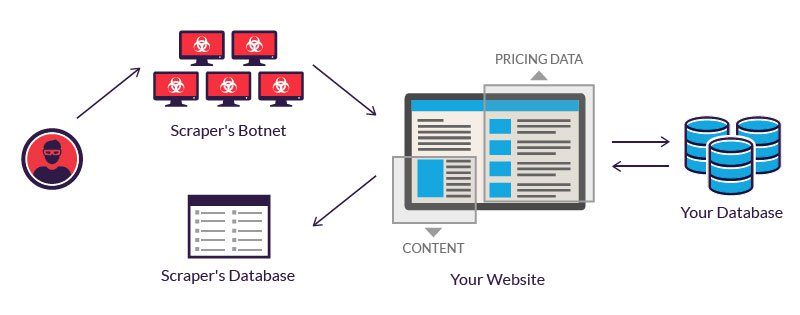
Web scraping is a technique to fetch data from websites. While surfing on the web, many websites don’t allow the user to save data for personal use. One way is to manually copy-paste the data, which both tedious and time-consuming. Web Scraping is the automation of the data extraction process from websites. This event is done with the help of web scraping software known as web scrapers. They automatically load and extract data from the websites based on user requirements. These can be custom built to work for one site or can be configured to work with any website. Uses of Web Scraping: Web scraping finds many uses both at a professional and personal level.
[Read More](https://www.geeksforgeeks.org/introduction-to-web-scraping/)



## 2.1 **Project Phase Overview**

This phase focuses on inspecting, extracting and merging the House information from each page of a Real Estate website (www.propertypro.ng) using BeautifulSoup Package and saves it on CSV.

**About Propertypro**


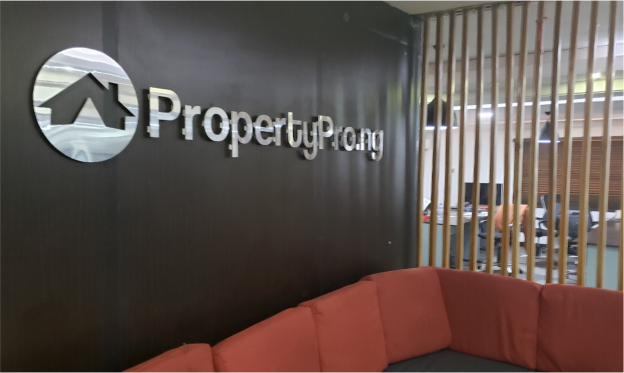

PropertyPro.ng is the leading real estate property centre platform in Nigeria. With a web-based platform for property rentals and sales, we provide users with the best property search experience both online and offline by connecting them with legitimate and verified real estate agents. In the Nigerian property market, with over 60,000 property listings which include properties like homes, houses, lands, shops, office spaces and other commercial properties, small, medium and large-scale real estate companies in Nigeria who desire to scale up the sales and rentals of their properties can partner with PropertyPro.ng


# 3.0 **IMPORT LIBRARIES**

In this section, we imported the neccessary packages/Libraries needed for inspecting and extracting data from the web such as Beautiful soup, request, time and sleep. We also imported pandas for merging and conversion of data to csv. 

In [ ]:
# importing required libraries
import pandas as pd #for merging and conversion to csv
from bs4 import BeautifulSoup #for extraction of data from website
import requests #for inspection and to send request to download data
import time 
from time import sleep

# 4.0 **WEB INSPECTION**

In [ ]:
# target URL to scrap
base_url ="https://www.propertypro.ng/property-for-sale/house/?search=lagos&bedroom=&min_price=&max_price="
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36'}
# send request to download the data
r = requests.get(base_url, headers=headers)
r.status_code


200

We stored our desired web url in a variable called `url` then stored the user agent in a variable `headers`. a user agent is any software, acting on behalf of a user, which "retrieves, renders and facilitates end-user interaction with Web content". A user agent is therefore a special kind of software agent. Some prominent examples of user agents are web browsers and email readers.

Then, storing the request.get(url, headers=headers) in a variable r to make a request to a the web page, and return the status code: ***200***. Statu code 200 indicate that our request has been accpetable by the web browser, other status code do have defferent definitions see [here](https://www.w3.org/Protocols/rfc2616/rfc2616-sec10.html) for more explanation





# 5.0 **DATA EXTRACTION (BEAUTIFULSOUP)**

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. [Read More](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


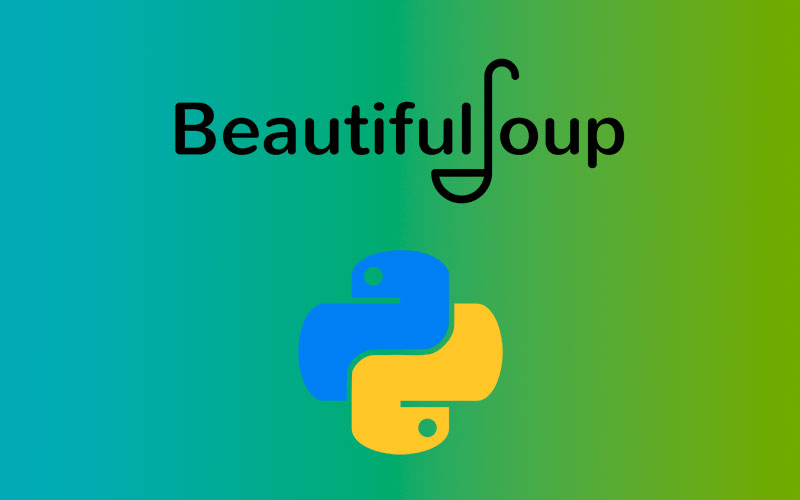

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.title.get_text())

House for sale  in Nigeria (29,402 listings) | PropertyPro.ng


## 5.1 **LOCATION DATA**

In this section we extracted the location of these houses and stored them in a list. The location of a house influences the price of the house as houses are more expensive in urban areas than rural areas.

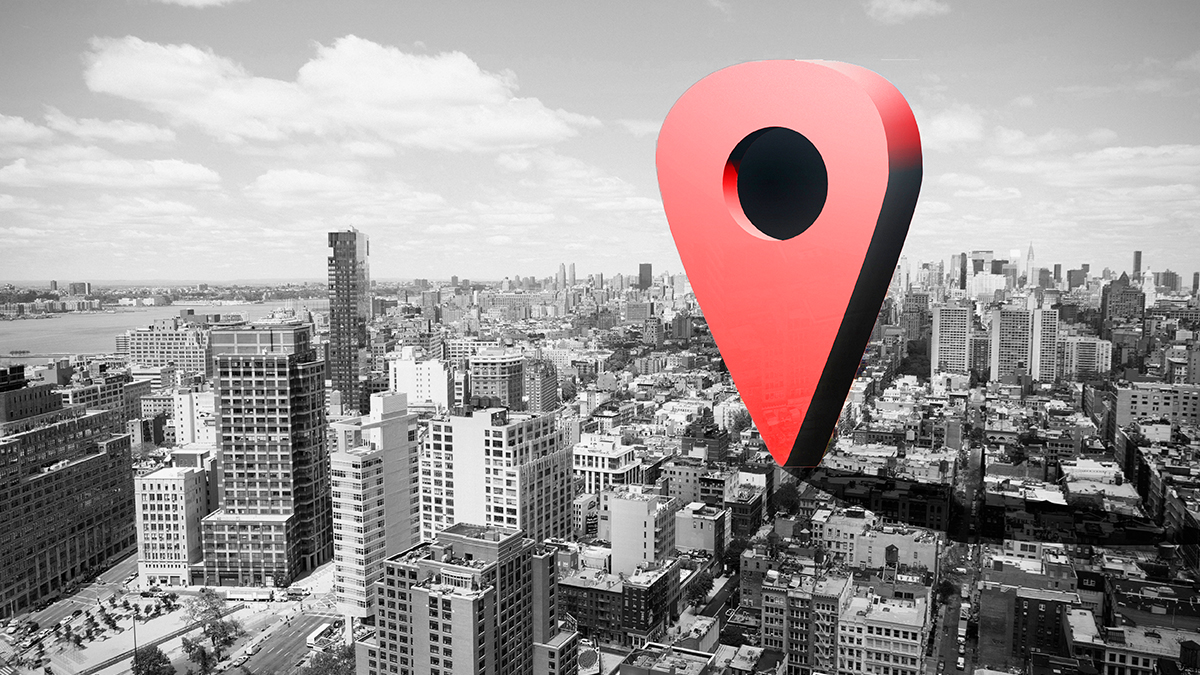

In [ ]:
#storing the data:
locations = soup.select('.single-room-text > h4')
#confirming the length of location data
len(locations)

22

In [ ]:
locations[0] #confirming extracted dats

<h4><img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>... Mojisola Onikoyi Estate Ikoyi Lagos</h4>

In [ ]:
#fixing all loaction into a list

all_location = []

for i in locations:
    location = i.get_text().split()
    location = location[-2]
    location = location.replace(',', '')
    all_location.append(location)


In [ ]:
#confirming data inside list
all_location

['Ikoyi',
 'Lekki',
 'Lekki',
 'Lekki',
 'Lekki',
 'Lekki',
 'Ikoyi',
 'Isolo',
 'Lekki',
 'Lekki',
 'Ikoyi',
 'Lekki',
 'Lekki',
 'VGCLekki',
 'AjahAjah',
 'Lekki',
 'LafiajiLekki',
 'TollgateLekki',
 'Ikoyi',
 'Lekki',
 'Lekki',
 'Ikoyi']

In [ ]:
#confirming the length of location data
len(all_location) 

22

## 5.2 **TOILETS, BEDS, BATHROOMS DATA**

These datas are important in house search and they also are factors that influences prices of house in any given location. The more the  number of bedrooms required the more the price of the house. Sometimes the number toilets and bathrooms are equal to the number of bedrooms in a house and other times they are unequal e.g a 5 bedroom apartment might have 5 toilets and 5 bathrooms, in other scenario a wharehouse might have 1 toilet and no bathrooms.


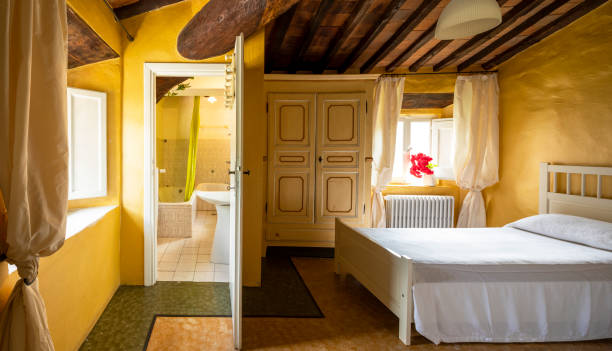

In [ ]:
#storing the features:
facilities = soup.select('.fur-areea > span')
#confirming the length of all facilities
len(facilities)

66

In [ ]:
#finding out the arrangement of content in the list
facilities[1].text

'6 baths'

In [ ]:
#fixing all bedrooms, bathrooms and toilets into a list
#Using the split(), get_text and append() function to get the exact number we need to use for these project.
#saving each facilities in their resprective lists

all_bedroom = [] #Creating an empty list of bedroom
all_bathroom = [] #creating an empty list of bathroom
all_toilet = [] #creating an empty list of toilet

for i, a in enumerate(facilities):
    if i in range(2,66,3):
        a = a.get_text().split()
        toilet = a[0]
        all_toilet.append(toilet)
    elif i in range(1,66,3):
        a = a.get_text().split()
        bathroom = a[0]
        all_bathroom.append(bathroom)
    elif i in range (0,66,3):
        a = a.get_text().split()
        bedroom = a[0]
        all_bedroom.append(bedroom)


In [ ]:
all_toilet


['7',
 '2',
 '5',
 '5',
 '3',
 '5',
 '5',
 '6',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '5',
 '5',
 '6',
 '4',
 '5',
 '6']

In [ ]:
len(all_toilet)


22

In [ ]:
all_bathroom


['6',
 '1',
 '4',
 '4',
 '2',
 '4',
 '5',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '4',
 '4',
 '5',
 '3',
 '5',
 '5']

In [ ]:
len(all_bathroom)

22

In [ ]:
all_bedroom

['6',
 '1',
 '4',
 '4',
 '2',
 '4',
 '3',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '4',
 '4',
 '5',
 '3',
 '4',
 '5']

In [ ]:
len(all_bedroom)

22

## 5.3 **PRICE DATA**
House price data is very important as it is our target variable. Price is dependent on so many factors such as type of house, number of bedrooms or rooms in the house, number of toilets and bathrooms and where the house is located. There are other external factors to consider when fixing the price of a house, such as security of the area where the house is located and it proximity to landmarks.

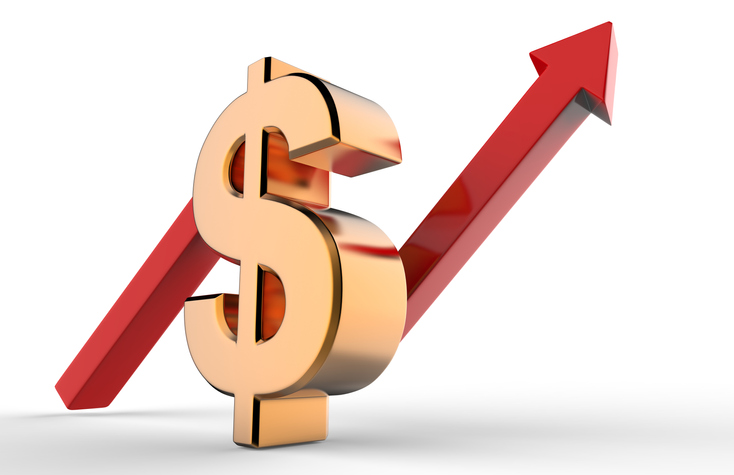

In [ ]:
#storing the features
prices = soup.select('.n50 > h3 > span')
#confirming the length of prices features
len(prices)

44

In [ ]:
prices[0].text

<span content="NGN" itemprop="priceCurrency">₦</span>

In [ ]:
all_price = []

for i,price in enumerate(prices):
    if i % 2 != 0:
        all_price.append(price.getText().replace('/year', ''))


In [ ]:
all_price

['310,000,000',
 '25,000,000',
 '55,000,000',
 '45,000,000',
 '35,000,000',
 '55,000,000',
 '280,000,000',
 '55,000,000',
 '320,000,000',
 '80,000,000',
 '205,000,000',
 '100,000,000',
 '55,000,000',
 '40,000,000',
 '33,000,000',
 '120,000,000',
 '43,000,000',
 '40,000,000',
 '595,000,000',
 '40,000,000',
 '80,000,000',
 '520,000,000']

In [ ]:
len(all_price)

22

# 5.4 **HOUSE TYPES**

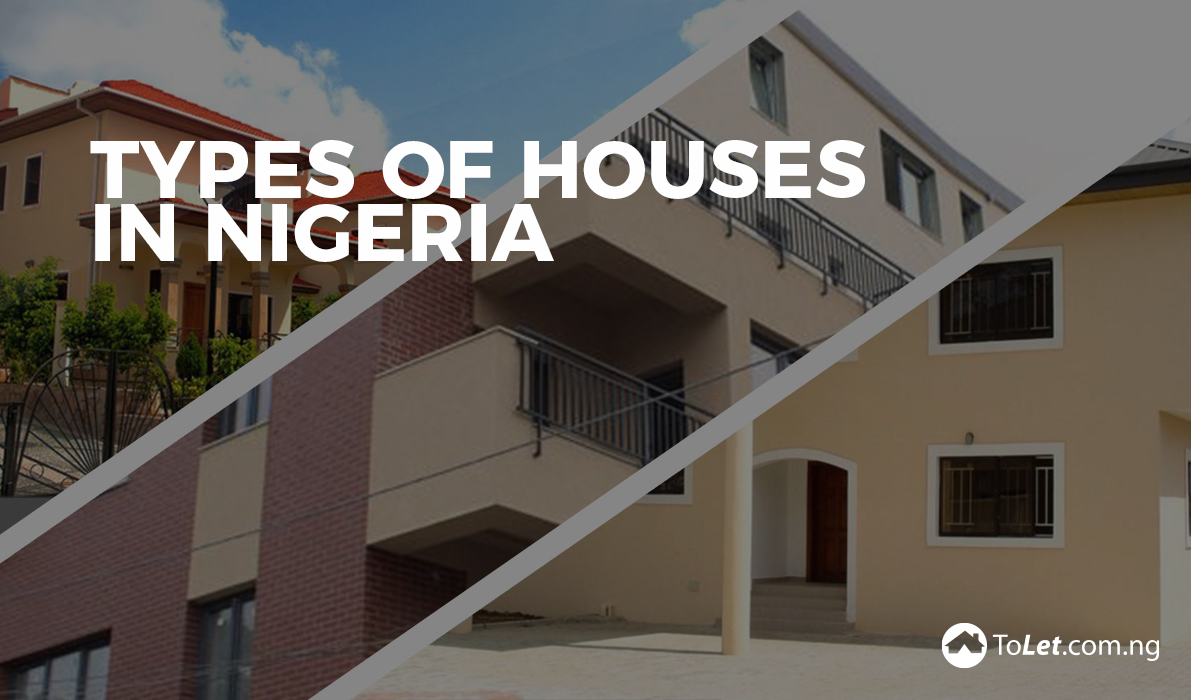

In Nigeria, it’s unpopular to see real estate such as Igloos, tents, trailers, gingerbread houses or underground homes. Although, it is rumored that in each state there is at least one underground home. Hard to believe, since we sit as the poverty capital of Africa.

Unlike the western countries, ranches are not common housing type in Nigeria but in states where individuals possess many plots of land, the houses are somewhat related to a ranch as there is usually a large expanse of land in front of the house. They may even have a farmland in the backyard of the house.

 There’s so much of confusion as to what house is which and that’s why we have taken the time to carefully pick out and show you different housing types in Nigeria [Read More](https://www.propertypro.ng/blog/types-of-houses-in-nigeria/)



In [ ]:
#storing the features
titles = soup.select('.single-room-text > a > h2')
#confirming the length of titles features
len(titles)

22

In [ ]:
titles[0].text


<h2 class="listings-property-title">6 BEDROOM DETACHED DUPLEX HOUSE FOR SALE</h2>

In [ ]:
#fixing all bedrooms and description into a list

all_type = []
all_status = []

for i in titles:
    title_split = i.get_text().split()
    types = title_split[2:4]
    status = title_split[-1]
    f_house = ' '.join(types)
    all_type.append((f_house).replace('/', ''))
    all_status.append(status)


In [ ]:
all_type

['DETACHED DUPLEX',
 'MINI FLAT',
 'TERRACED DUPLEX',
 'TERRACED DUPLEX',
 'TERRACED DUPLEX',
 'SEMI DETACHED',
 'TERRACED DUPLEX',
 'DETACHED DUPLEX',
 'DETACHED DUPLEX',
 'SEMI DETACHED',
 'SELF CONTAIN',
 'TERRACED DUPLEX',
 'SEMI DETACHED',
 'TERRACED DUPLEX',
 'TERRACED DUPLEX',
 'DETACHED DUPLEX',
 'TERRACED DUPLEX',
 'TERRACED DUPLEX',
 'DETACHED DUPLEX',
 'BLOCKS OF',
 'SEMI DETACHED',
 'DETACHED DUPLEX']

In [ ]:
#confirming the length of description features
len(all_type)

22

In [ ]:
all_status


['SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE',
 'SALE']

In [ ]:
#confirming the house status

len(all_status)

22

In [ ]:
#creating a function to be able to return all list generated

def all_data(base_url):
    r = requests.get (base_url, headers=headers)
    soup = BeautifulSoup(r.text,'html.parser')
    
    
    locations = soup.select('.single-room-text > h4')
    all_location = []
    for i in locations:
        location = i.get_text().split()
        location = location[-2]
        location = location.replace(',', '')
        all_location.append(location)
        
    
    facilities = soup.select('.fur-areea > span')
    all_bedroom = []
    all_bathroom = []
    all_toilet = []
    
    for i, a in enumerate(facilities):
        if i in range(2,66,3):
            a = a.get_text().split()
            toilet = a[0]
            all_toilet.append(toilet)
        elif i in range(1,66,3):
            a = a.get_text().split()
            bathroom = a[0]
            all_bathroom.append(bathroom)
        elif i in range (0,66,3):
            a = a.get_text().split()
            bedroom = a[0]
            all_bedroom.append(bedroom)
    
    
    prices = soup.select('.n50 > h3 > span')
    all_price = []
    for i,price in enumerate(prices):
        if i % 2 != 0:
            all_price.append(price.getText().replace('/year', ''))
    
    
    
    titles = soup.select('.single-room-text > a > h2')
    all_type = []
    all_status = []
    for i in titles:
        title_split = i.get_text().split()
        types = title_split[2:4]
        status = title_split[-1]
        f_house = ' '.join(types)
        all_type.append((f_house).replace('/', ''))
        all_status.append(status)
    
    

    return (all_location, all_bedroom, all_bathroom, all_toilet, all_price, all_type, all_status)


Now we have successfully extracted all our data from just one web the desired URL. We then move to the next phase were we extract data from other pages of the web page and merge them into a master list.

# 6.0 **DATA MERGING**

Data merging is the process of combining two or more similar records into a single one. Merging is done to add variables to a dataset, append or add cases or observations to a dataset, or remove duplicates and other incorrect information.

Done correctly, this process makes it easier and faster to analyze data stored in multiple locations, worksheets, or data tables. Merging data into a single point is necessary in certain situations, especially when an organization needs to add new cases, variables, or data based on the lookup values. However, data merging needs to be performed with caution; otherwise, it can lead to duplication, inaccuracy, or inconsistency issues.

[Read more](https://www.tibco.com/reference-center/what-is-data-merging)

In [ ]:
#crawls all the pages on the website from page 1 to 100

urls = [base_url]
for i in range(1,500):
    all_url = base_url + '&page=' + str(i)
    urls.append(all_url)

In [ ]:
urls[398]


'https://www.propertypro.ng/property-for-sale/house/?search=lagos&bedroom=&min_price=&max_price=&page=398'

In [ ]:
#create an empty master list
#store etracted data from all pages of the url in respective master lists

master_location = []
master_bedroom = []
master_bathroom = []
master_toilet = []
master_price = []
master_type = []
master_status = []

for all_url in urls:
    all_location, all_bedroom, all_bathroom, all_toilet, all_price, all_type, all_status = all_data(all_url)
    
    master_location += all_location
    master_bedroom += all_bedroom
    master_bathroom += all_bathroom
    master_toilet += all_toilet
    master_price += all_price
    master_type += all_type
    master_status += all_status
    
    time.sleep(10)


In [ ]:
#confirming the length of each list of attributes created

print(len(master_bedroom))

print(len(master_location))

print(len(master_bathroom))

print(len(master_toilet))

print(len(master_price))

print(len(master_type))

print(len(master_status))

11000
11000
11000
11000
11000
11000
11000


# 7.0 **DATA EXPORTATION**
In this section, we will export our data by first storing it to a Pandas DataFrame then to a CSV file by using the Pandas to_csv() method. By default, the to csv() method exports DataFrame to a CSV file with row index as the first column and comma as the delimiter. 

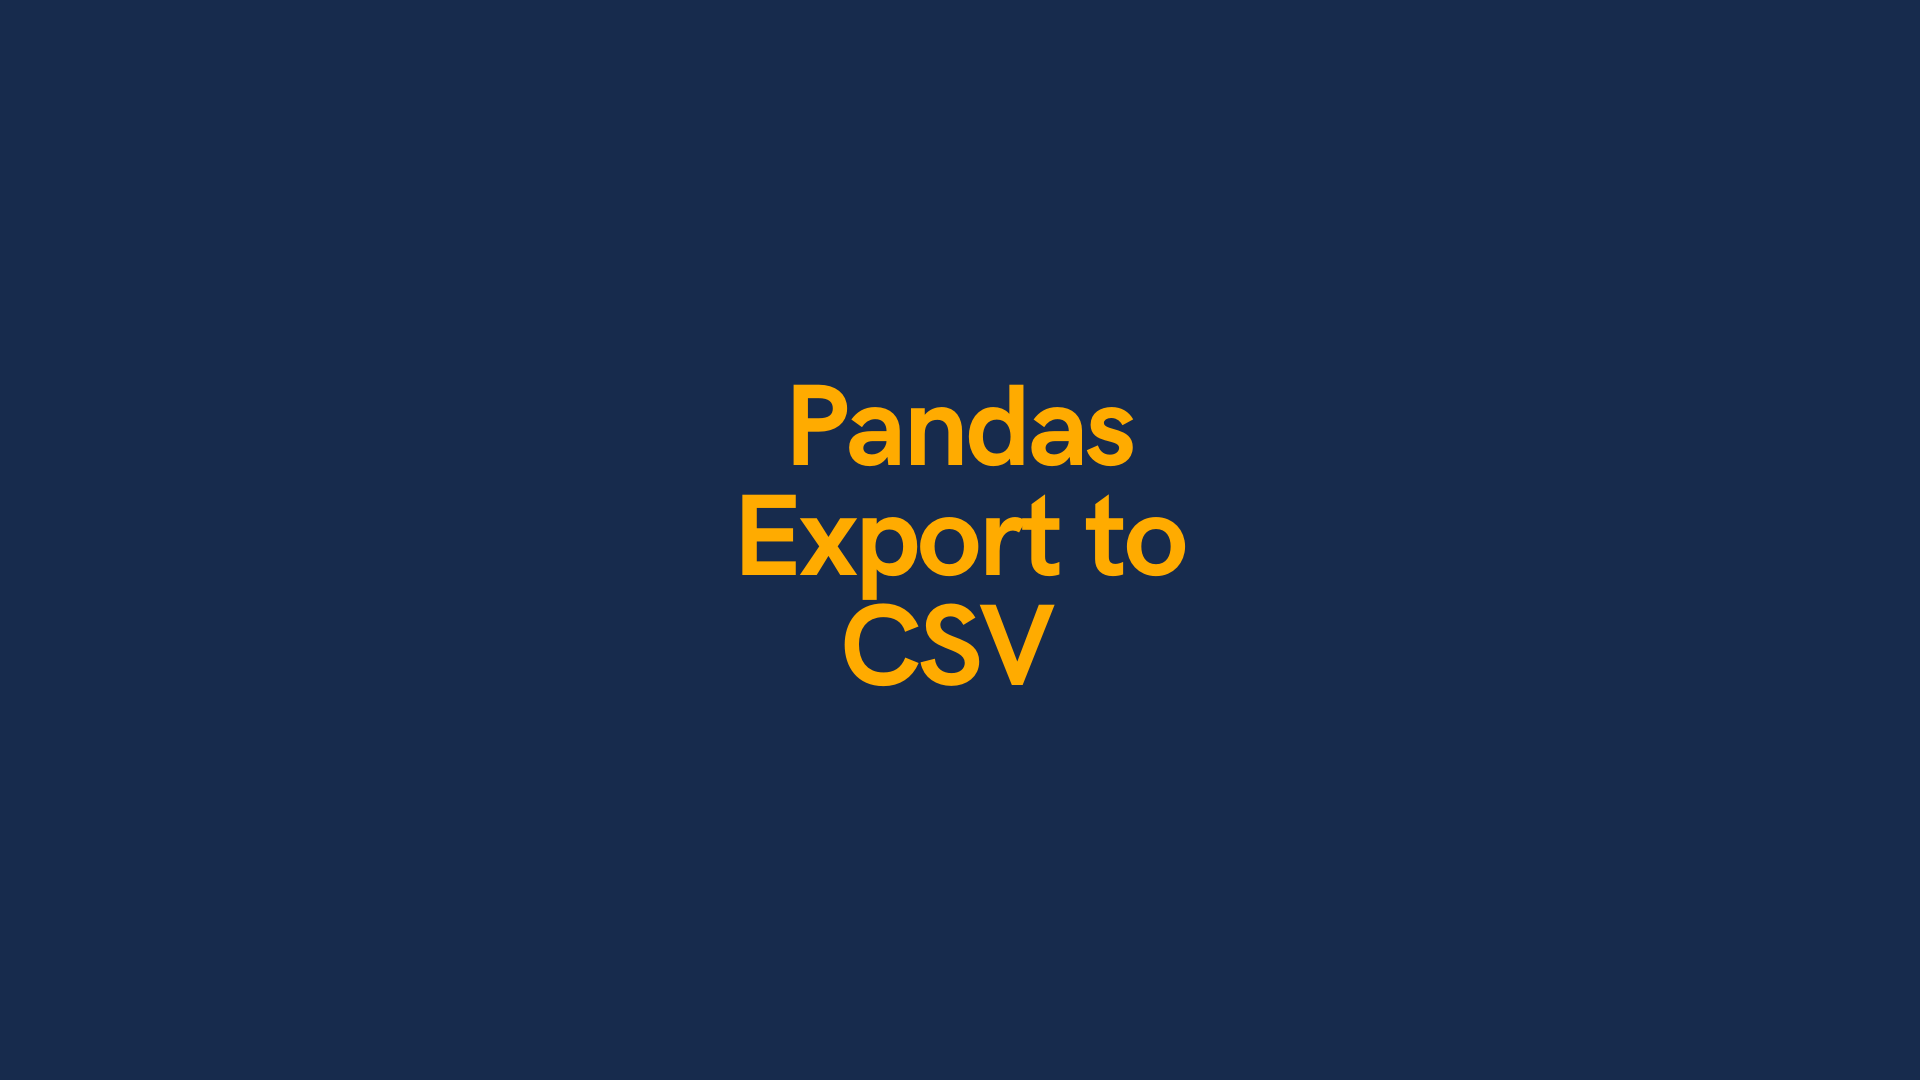




In [ ]:
# store the extracted  into a dataframe
house_buy = pd.DataFrame ({"house-types": master_type,
                            "location": master_location,
                            "bedrooms": master_bedroom,
                            "bathrooms": master_bathroom,
                            "toilets": master_toilet,
                            "price": master_price,
                            "rent / sale": master_status
                           })

In [ ]:
#converting dataframe to CSV

house_buy.to_csv("house_buy.csv")

In [ ]:
house_to_buy = pd.read_csv('house_buy.csv') #loading csv

In [ ]:
house_to_buy #reading csv

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE
...,...,...,...,...,...,...,...,...
10995,10995,SEMI DETACHED,Lekki,4,4,5,"60,000,000",SALE
10996,10996,SEMI DETACHED,Ikoyi,4,4,5,"240,000,000",SALE
10997,10997,HOUSE FOR,Surulere,beds,baths,Toilets,"150,000,000",SALE
10998,10998,SEMI DETACHED,Ajah,4,4,5,"48,000,000",SALE


# 7.0 **CONCLUSION**

We have successfully extracted our house-buy data from all pages of propertypro, save ad exported the data as csv files. In the next phase of this project, we will further clean the data and explore the data for further analysis.